# Model Interpretability and Evaluation

In [1]:
import numpy as np
import pandas as pd


df = pd.read_csv('/Users/boyun/Desktop/SMU/DS7333-QuantifyingTheWorld/MSDS-7333-QTW/data/log2.csv')

In [3]:
# Pivot Action by port

df.pivot_table(index='Action', columns='Source Port', aggfunc='count')

Bytes                                                        ...  \
Source Port 0     5     20    22    25    50    67    68    80    123    ...   
Action                                                                   ...   
allow        85.0   NaN   1.0   4.0   2.0   NaN   NaN   NaN   2.0  34.0  ...   
deny         88.0   1.0   1.0   NaN   NaN   8.0   2.0   9.0  44.0   NaN  ...   
drop          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
reset-both    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

            pkts_sent                                                        
Source Port     65525 65526 65527 65528 65529 65530 65531 65532 65533 65534  
Action                                                                       
allow             1.0   4.0   1.0   5.0   4.0   8.0   2.0   3.0   1.0   1.0  
deny              NaN   3.0   NaN   1.0   2.0   NaN   NaN   NaN   NaN   NaN  
drop              1.0   1.0   NaN   1.0   1.0   1.0   NaN   NaN   1.0   NaN  
reset-both        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[4 rows x 227240 columns]

In [4]:
df['target'] = df['Action'].map({'allow': "Allow", 'deny': "Deny", 'drop': "Deny", 'reset-both': "Deny"})

In [5]:
df["target"].value_counts(normalize=False)

Allow    37640
Deny     27892
Name: target, dtype: int64

In [6]:

df.drop(columns="Action", inplace= True)
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,target
0,57222,53,54587,53,177,94,83,2,30,1,1,Allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,Allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,Allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,Allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,Allow


In [32]:
# prepare test and train data
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'target'].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

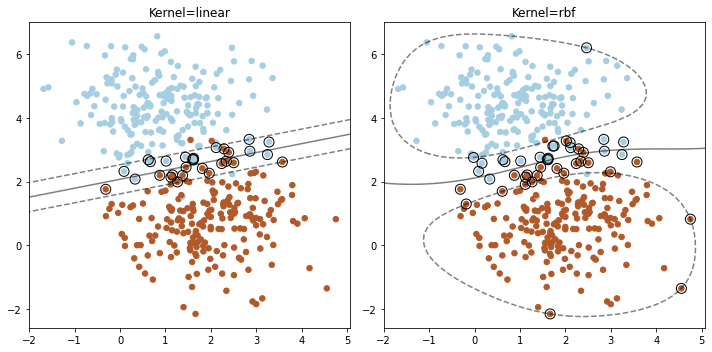

In [22]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=400, centers=2, random_state=0)
plt.figure(figsize=(10, 5))

for i, K in enumerate(['linear','rbf']):
    # "hinge" is the standard SVM loss
    clf = SVC(C=1, kernel=K, random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("Kernel=" + str(K))
    
plt.tight_layout()
plt.show()

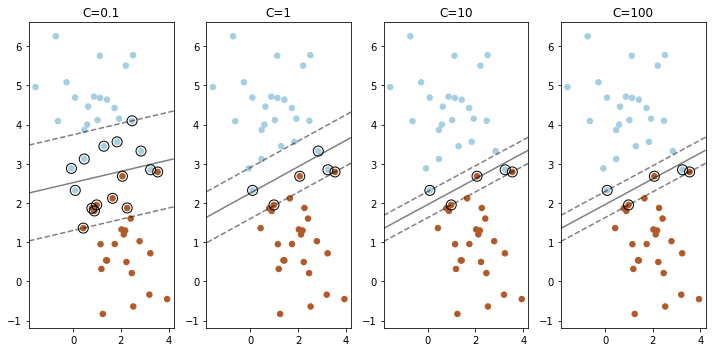

In [23]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0)

plt.figure(figsize=(10, 5))

for i, C in enumerate([0.1,1,10,100]):
    # "hinge" is the standard SVM loss
    clf = SVC(C=C, kernel='linear', random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 4, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    
plt.tight_layout()
plt.show()

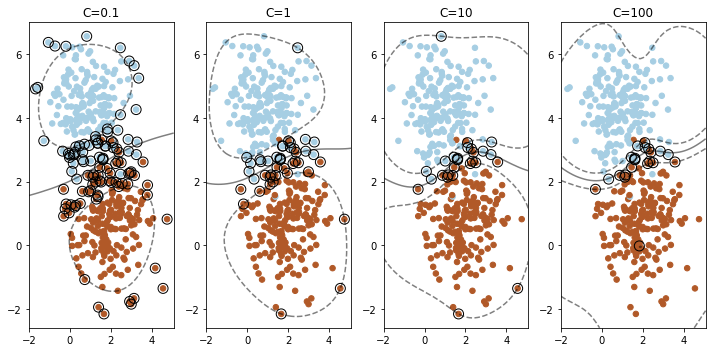

In [24]:
X, y = make_blobs(n_samples=400, centers=2, random_state=0)
plt.figure(figsize=(10, 5))

for i, C in enumerate([0.1,1,10,100]):
    # "hinge" is the standard SVM loss
    clf = SVC(C=C, kernel='rbf', random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 4, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    
plt.tight_layout()
plt.show()

In [70]:
# Loading linear SVM using original dataset
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics as mt
from sklearn.model_selection import cross_val_score

# Using cross validation, test/train split 80:20
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,test_size= 0.2, random_state=42) 

X = df.loc[:, df.columns != 'target'].values
y = df['target'].values

for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]


# train the model just as before
svm_clf = SVC(C=1.0, kernel='linear', random_state=10) # get object
svm_clf.fit(X_train, y_train)  # train object

y_hat = svm_clf.predict(X_test) # get test set precitions

# Select the rows of the train indices and make df_tested_on dataframe
df_tested_on = X[train_indices]

# now get the support vectors from the trained model
df_support = df_tested_on[svm_clf.support_,:].copy()
df_support = pd.DataFrame(df_support, columns = ["Source Port","Destination Port","NAT Source Port","NAT Destination Port","Bytes","Bytes Sent","Bytes Received","Packets","Elasped Time(sec)","pkts_sent","pkts_received"])

df_support['target'] = y[svm_clf.support_].copy() # add back in the 'target' Column to the pandas dataframe

X = X.copy()
X = pd.DataFrame(X, columns = ["Source Port","Destination Port","NAT Source Port","NAT Destination Port","Bytes","Bytes Sent","Bytes Received","Packets","Elasped Time(sec)","pkts_sent","pkts_received"])
X['target'] = y # also add it back in for the original data
df_support=df_support.dropna()
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           235 non-null    int64 
 1   Destination Port      235 non-null    int64 
 2   NAT Source Port       235 non-null    int64 
 3   NAT Destination Port  235 non-null    int64 
 4   Bytes                 235 non-null    int64 
 5   Bytes Sent            235 non-null    int64 
 6   Bytes Received        235 non-null    int64 
 7   Packets               235 non-null    int64 
 8   Elasped Time(sec)     235 non-null    int64 
 9   pkts_sent             235 non-null    int64 
 10  pkts_received         235 non-null    int64 
 11  target                235 non-null    object
dtypes: int64(11), object(1)
memory usage: 23.9+ KB


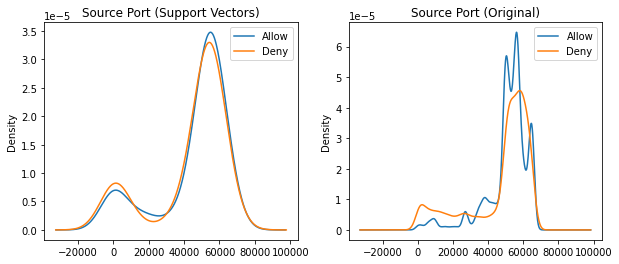

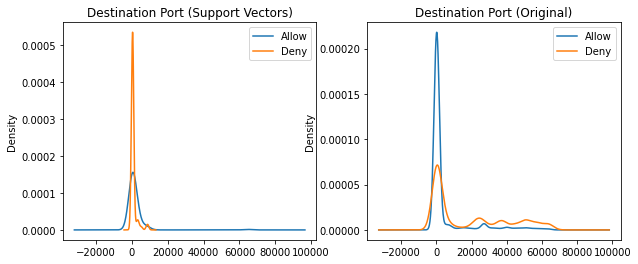

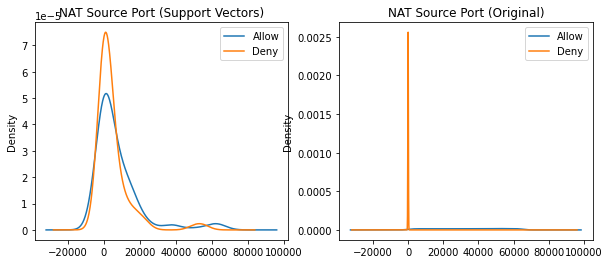

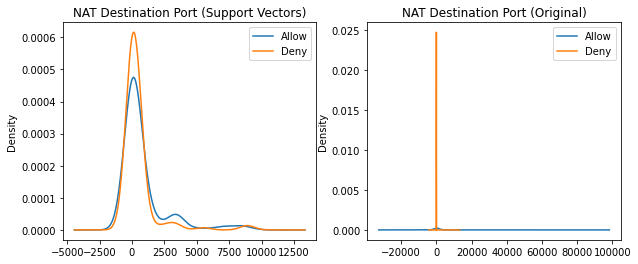

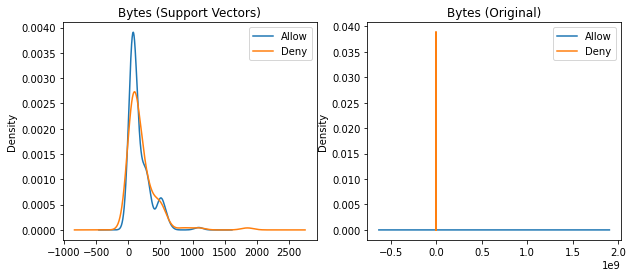

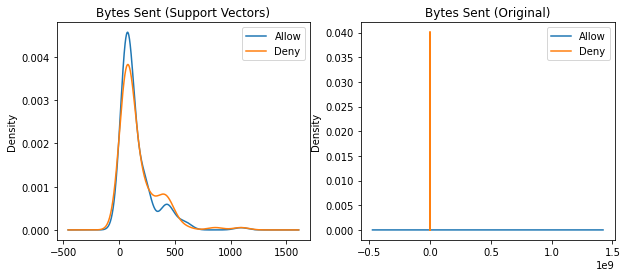

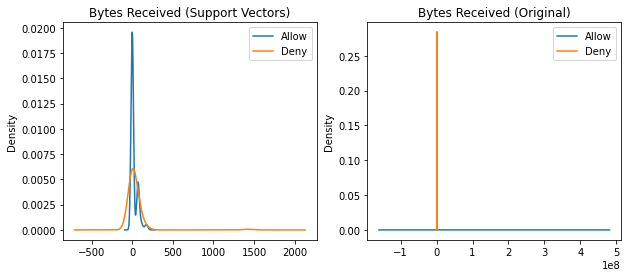

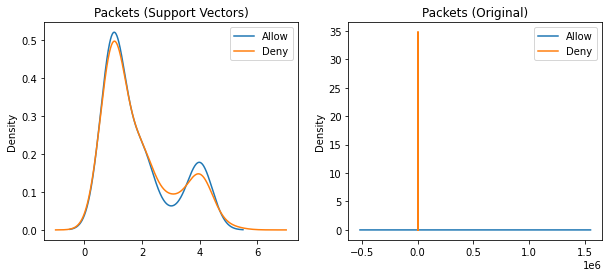

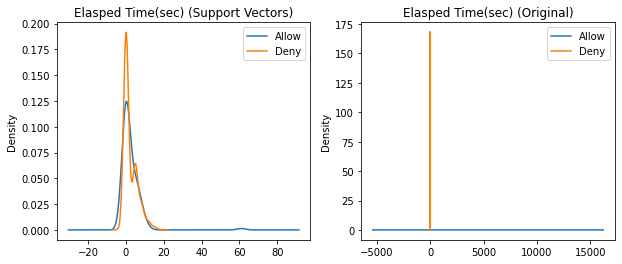

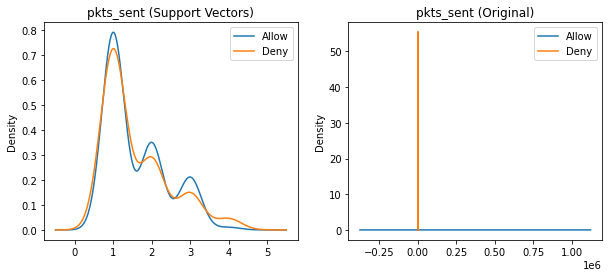

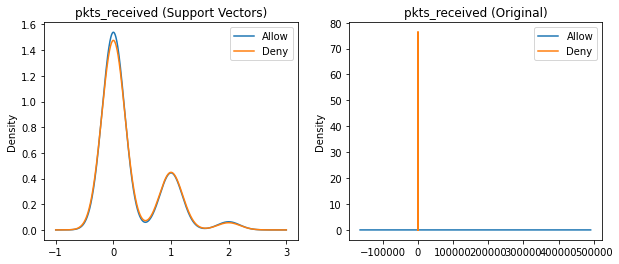

In [71]:
import pandas
from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['target'])
df_grouped = X.groupby(['target'])

# plot KDE of Different variables
vars_to_plot = ["Source Port","Destination Port","NAT Source Port","NAT Destination Port","Bytes","Bytes Sent","Bytes Received","Packets","Elasped Time(sec)","pkts_sent","pkts_received"]

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Allow','Deny'])
    plt.title(v+' (Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Allow','Deny'])
    plt.title(v+' (Original)')